# MALARIAL PARASITE DETECTION USING DEEP LEARNING

In [1]:
#!pip install tensorflow-gpu==2.0.0-rc0

In [2]:
#!pip install --upgrade tensorflow-gpu==2.2.0 --user
#!pip uninstall tensorflow-datasets
#!pip install tensorflow-datasets==4.0.0

In [3]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

print(tf.__version__)

2.7.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt 

### LOADING THE DATASET 

In [5]:
!git clone https://github.com/ddvader44/AI-Project.git

Cloning into 'AI-Project'...
remote: Enumerating objects: 27574, done.
remote: Counting objects: 100% (27574/27574), done.
remote: Compressing objects: 100% (27572/27572), done.
remote: Total 27574 (delta 0), reused 27574 (delta 0), pack-reused 0
Receiving objects: 100% (27574/27574), 332.07 MiB | 44.37 MiB/s, done.
Checking out files: 100% (27565/27565), done.


The original dataset can be found on the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ , also available on kaggle.

## IMAGE PREPROCESSING

In [6]:
img_width = 64
img_height = 64

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0,
                             validation_split=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             #rotation_angle=45,
                             shear_range=16
                             )

In [8]:
train_data_generator = datagen.flow_from_directory(directory = '/content/AI-Project/malaria-dataset', 
                                                   target_size=(img_width, img_height), 
                                                   class_mode='binary', 
                                                   batch_size = 16, 
                                                   subset = 'training',
                                                   #color_mode = 'grayscale',
                                                   interpolation = 'nearest',
                                                   shuffle=True,
                                                   seed=42
                                                   
                                                   
                                                    )

Found 22048 images belonging to 2 classes.


In [9]:
validation_data_generator = datagen.flow_from_directory(directory = '/content/AI-Project/malaria-dataset',
                                                        target_size=(img_width, img_height), 
                                                        class_mode='binary',
                                                        batch_size = 16, 
                                                        subset = 'validation' ,
                                                        #color_mode = 'grayscale',
                                                        interpolation = 'nearest',
                                                        shuffle=True,
                                                        seed=42                                                       
                                                        
                                                        )

Found 5510 images belonging to 2 classes.


In [10]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
#from keras.preprocessing.image import load_img ,img_to_array
#arr_img = img_to_array(train_data_generator[0])
#plt.imshow(arr_img/255)

## CNN MODEL BUILDING

In [13]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(img_width,img_height,3) , activation = 'relu' ))  #no of filters. kernel size,..
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_data_generator, 
                              steps_per_epoch = len(train_data_generator),
                              epochs = 7,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)                             
                              )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/7
1378/1378 [==============================] - 127s 92ms/step - loss: 0.5305 - accuracy: 0.7324 - val_loss: 0.2952 - val_accuracy: 0.9216
Epoch 2/7
1378/1378 [==============================] - 129s 94ms/step - loss: 0.2555 - accuracy: 0.9204 - val_loss: 0.1858 - val_accuracy: 0.9328
Epoch 3/7
1378/1378 [==============================] - 128s 93ms/step - loss: 0.2037 - accuracy: 0.9265 - val_loss: 0.1788 - val_accuracy: 0.9328
Epoch 4/7
1378/1378 [==============================] - 132s 96ms/step - loss: 0.1971 - accuracy: 0.9368 - val_loss: 0.1687 - val_accuracy: 0.9401
Epoch 5/7
1378/1378 [==============================] - 135s 98ms/step - loss: 0.1806 - accuracy: 0.9430 - val_loss: 0.1740 - val_accuracy: 0.9399
Epoch 6/7
1378/1378 [==============================] - 132s 96ms/step - loss: 0.1707 - accuracy: 0.9468 - val_loss: 0.1924 - val_accuracy: 0.9358
Epoch 7/7
1378/1378 [==============================] - 136s 99ms/step - loss: 0.1648 - accuracy: 0.9497 - val_loss: 0.1626 -

In [17]:
history.history

{'accuracy': [0.7323566675186157,
  0.9204009175300598,
  0.9265239238739014,
  0.9368196725845337,
  0.9429880380630493,
  0.9467525482177734,
  0.9497460126876831],
 'loss': [0.5304710268974304,
  0.25545451045036316,
  0.20372328162193298,
  0.1971142292022705,
  0.18060225248336792,
  0.17067492008209229,
  0.16482481360435486],
 'val_accuracy': [0.9215971231460571,
  0.9328493475914001,
  0.9328493475914001,
  0.9401088953018188,
  0.9399273991584778,
  0.9357531666755676,
  0.9417423009872437],
 'val_loss': [0.29515591263771057,
  0.1858474165201187,
  0.17884063720703125,
  0.16869424283504486,
  0.17403896152973175,
  0.1924210488796234,
  0.16263538599014282]}

In [18]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

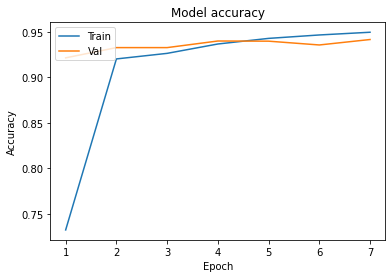

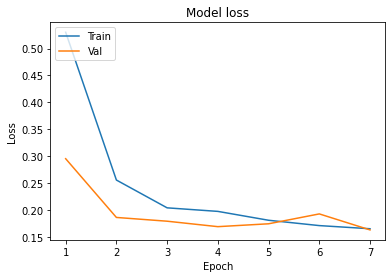

In [19]:
plot_learningCurve(history, 7)

In [20]:
#import pickle
#model.save('basic_cnn.h5')

In [21]:
#basic_cnn = tf.keras.models.load_model('./basic_cnn.h5')

### TESTING

In [22]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img


In [23]:
img1=load_img('/content/AI-Project/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',target_size=(img_width,img_height))
img2=load_img('/content/AI-Project/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png',target_size=(img_width,img_height))
img3=load_img('/content/AI-Project/malaria-dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png', target_size=(img_width,img_height))

In [24]:
x1 = img_to_array(img1)
x2 = img_to_array(img2)
x3 = img_to_array(img3)


In [25]:
x1 = x1.reshape((1,) + x1.shape)
x2 = x2.reshape((1,) + x2.shape)
x3 = x3.reshape((1,) + x3.shape)


In [26]:
y1 = model.predict(x1)
y2 = model.predict(x2)
y3 = model.predict(x3)


The prediction for image1 is : PARASITIZED


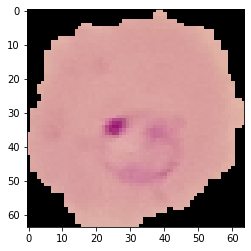

In [27]:
plt.imshow(img1)
if y1==1:
  print('The prediction for image1 is : UNINFECTED')
if y1==0:
  print('The prediction for image1 is : PARASITIZED')

The prediction for image2 is : UNINFECTED


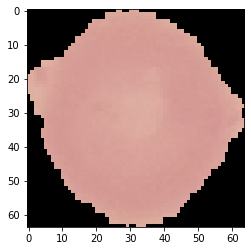

In [28]:
plt.imshow(img3)
if y3==1:
  print('The prediction for image2 is : UNINFECTED')
if y3==0:
  print('The prediction for image2 is : PARASITIZED')